In [3]:
##PyData Stack
import pandas as pd

##Plotting
import seaborn as sns
import matplotlib.pyplot as plt

##Expainer Tools
from sklearn.inspection import PartialDependenceDisplay

##Utilities
import pickle
import warnings
warnings.filterwarnings('ignore')


**Homework 0** <br>
**Explaianble AI Spring 2025**

**Total points:** 10 (10 + 1 bonus pt)<br>
**Overall Goal:** Brief exerise on Pre-model Explainability and PDPs <br>
**Due:02/20/2025** 

**Notes:**
* complete in colab or on your own local jupyter notebook
* submission is file upload (download your notebook as a .pynb)
* sample dataset can be found in canvass files: 'HW0 files/'



In [4]:
##Code to read in files

###uncomment and replace with the proper file paths
## read in model
with open('HW_0_model.pkl', 'rb') as file:
    model = pickle.load(file)

## Read Raw Data
raw_df = pd.read_csv('HW_0_raw_data.csv')

## Read Featurized Data
df = pd.read_csv('HW_0_featurized_data.csv')

## Read in X values
x = pd.read_csv('HW_0_X_values.csv')

**The column 'is_disputed' is the label for the data (where 1 = a distputed transaction).**<br>
**1.A**  Determine the distribution for label broken down by transaction_types (hint: might be easier to use the raw_data). <br>


**1.B** What can you observe from the distribution (i.e. write a short summary, no more than a few sentences, summarizing what you learned from the distributions)? <br>

**5pts**

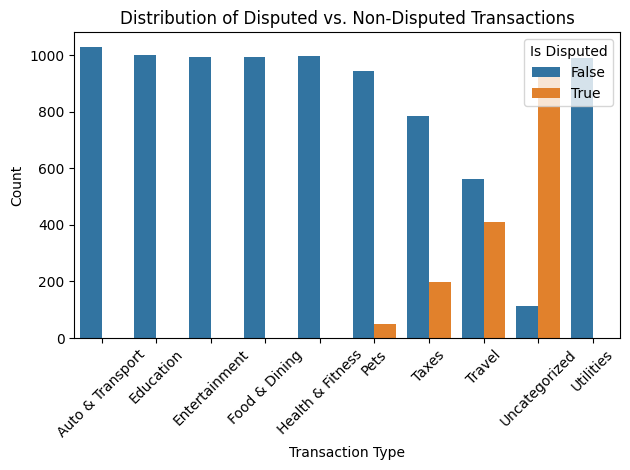

In [5]:
df_distribution = raw_df[['is_disputed', 'transaction_type']]

distribution = df_distribution.groupby(['transaction_type', 'is_disputed']).size().reset_index(name='count')

# Create a bar plot
sns.barplot(data=distribution, x='transaction_type', y='count', hue='is_disputed')

# Add labels and title
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Disputed vs. Non-Disputed Transactions')
plt.xticks(rotation=45)
plt.legend(title='Is Disputed')

# Show plot
plt.tight_layout()
plt.show()

Whenever a transaction is labeled as uncategorized it is much more likely that it will be disputed than any other category of transactions. One thing that's interesting though is in the Travel category there's still a decent amount of counts of being disputed in comparison to it not being disputed. It's also interesting to see that Taxes and Pets are the only other categories that have any counts of being disputed while the rest of the categories don't have any instances of a dispute.

**2.A** Consider the features ['current_balance']. Build/Visualize a PDP plot of this feature <br> 

**2.B** Build/Visualize an ICE plot for this feature <br>

**2.C**  What can you observe from (contrasting) these two plots (i.e. write a short summary, no more than a few sentences)? Contruct your summary as if it's intended for non-tech audience <br>

    The partial dependence plot made from the feature indicates that overall the current balance doesn't have too much of an impact on whether something will be disputed or not. This is further displayed in the ICE plot which shows multiple instances of transactions being disputed and not disputed despite having the same current balance. This indicates that a transaction being disputed is dependent on more than just the current balance feature.


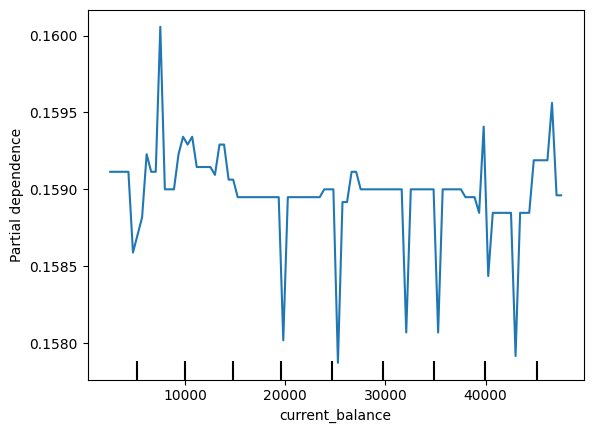

In [6]:
feature = ['current_balance']
PartialDependenceDisplay.from_estimator(model, x, feature)

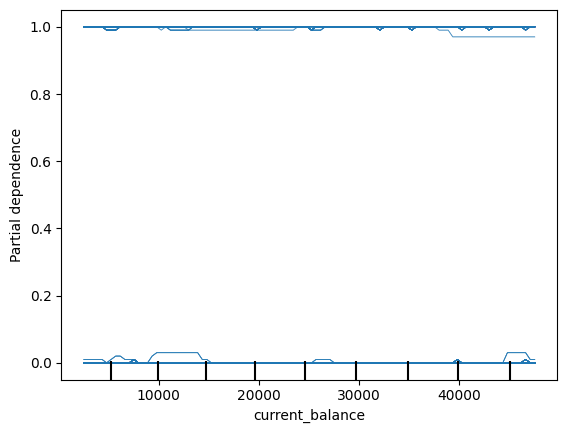

In [7]:
feature = ['current_balance']
PartialDependenceDisplay.from_estimator(model, x, feature, kind='individual')

**Bonus**. Build an Ale Plot using any features of interest, and interpret your results (Hint: some good libraries are Alibi and PyAle) <br> **1pts**

In [9]:
from alibi.explainers import AnchorTabular

# initialize and fit explainer by passing a prediction function and any other required arguments
explainer = AnchorTabular(predict_fn, feature_names=feature_names, category_map=category_map)
explainer.fit(X_train)

# explain an instance
explanation = explainer.explain(x)

NameError: name 'predict_fn' is not defined